In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [12]:
from google.colab import files
uploaded = files.upload()   # Choose your dataset CSV file from computer


Saving Crop Yiled with Soil and Weather.csv to Crop Yiled with Soil and Weather.csv


In [13]:
df = pd.read_csv("Crop Yiled with Soil and Weather.csv")   # replace with your file name
df.head()


,Fertilizer,temp,N,P,K,yeild
0,80.0,28.0,80.0,24.0,20.0,12.0
1,77.0,27.0,78.0,23.0,20.0,12.0
2,80.0,26.0,80.0,24.0,20.0,12.0
3,80.0,28.0,80.0,24.0,20.0,12.0
4,78.0,27.0,78.0,23.0,19.0,12.0


In [14]:
# Check missing values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Example: Fill missing rainfall with mean (if missing exists)
if "rainfall" in df.columns:
    df["rainfall"].fillna(df["rainfall"].mean(), inplace=True)


Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64


In [15]:
if "Season" in df.columns:
    df = pd.get_dummies(df, columns=["Season"])


In [17]:
X = df.drop("yeild", axis=1)   # Features
y = df["yeild"]                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Linear Regression
lr = LinearRegression().fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
preds_lr = lr.predict(X_test)
preds_rf = rf.predict(X_test)

# Linear Regression
print("Linear Regression MAE:", mean_absolute_error(y_test, preds_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, preds_lr)))

# Random Forest
print("Random Forest MAE:", mean_absolute_error(y_test, preds_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, preds_rf)))


Linear Regression MAE: 0.5719688097717487
Linear Regression RMSE: 0.6916624702924824
Random Forest MAE: 0.12086698995710375
Random Forest RMSE: 0.18411057613191517


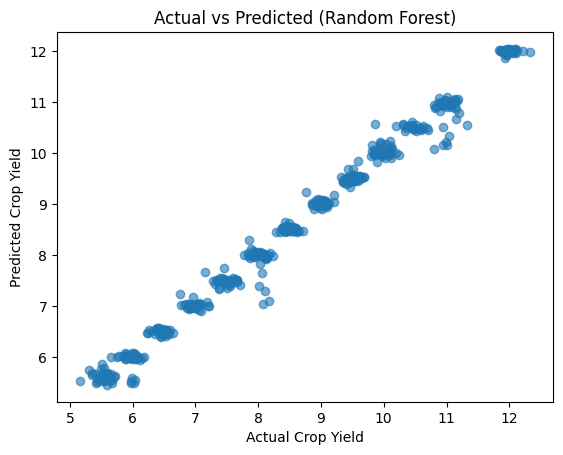

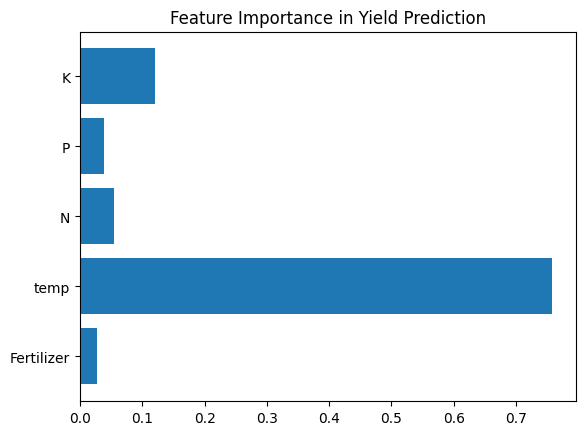

In [21]:
import matplotlib.pyplot as plt

# Actual vs Predicted
plt.scatter(y_test, preds_rf, alpha=0.6)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

# Feature Importance
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance in Yield Prediction")
plt.show()


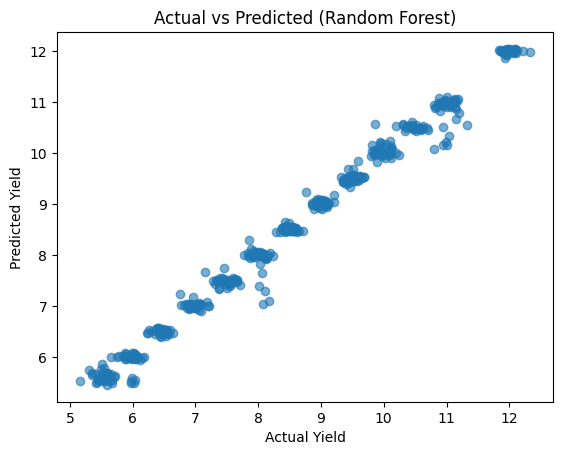

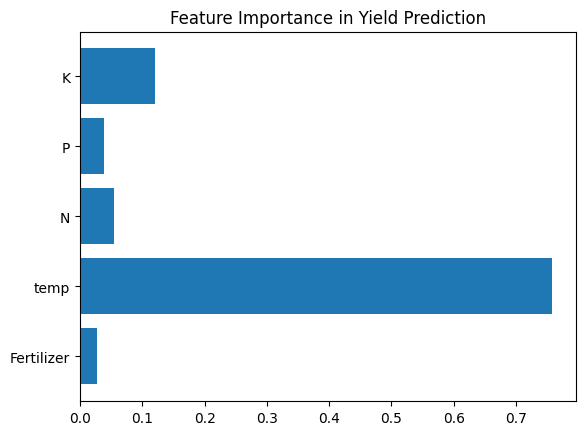

In [22]:
import matplotlib.pyplot as plt

# Actual vs Predicted
plt.scatter(y_test, preds_rf, alpha=0.6)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

# Feature importance
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance in Yield Prediction")
plt.show()


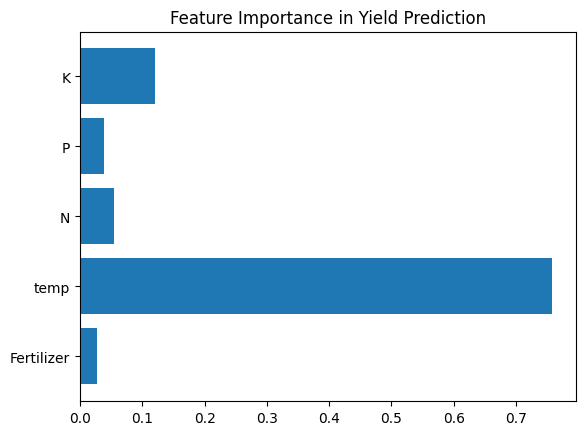

In [23]:
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance in Yield Prediction")
plt.show()
